# **Kaggle - Titanic (Youhan Lee)**
Source - https://kaggle-kr.tistory.com/17#1 | https://www.youtube.com/@YouHanLee


In [1]:
#필요한 라이브러리 모두 다운받기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #datavisualisation
import seaborn as sns # datavisualisation 스타일 중 하나 (나중에 다른거 쓰던가.. default 값 아님)

plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5) # 미리 graphic style 및 폰트의 사이즈를 정하는 것

import missingno as msmo # null 관리

import warnings
warnings.filterwarnings('ignore') # ignoring warnings

%matplotlib inline

In [2]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()


Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [3]:
# pandas 불러오기
import pandas as pd

# 데이터 불러오기
df_train = pd.read_csv('train.csv')  # train 데이터셋
df_test = pd.read_csv('test.csv')    # test 데이터셋

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percentage of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percentage of NaN value: 0.00%
column:     Pclass	 Percentage of NaN value: 0.00%
column:       Name	 Percentage of NaN value: 0.00%
column:        Sex	 Percentage of NaN value: 0.00%
column:        Age	 Percentage of NaN value: 20.57%
column:      SibSp	 Percentage of NaN value: 0.00%
column:      Parch	 Percentage of NaN value: 0.00%
column:     Ticket	 Percentage of NaN value: 0.00%
column:       Fare	 Percentage of NaN value: 0.24%
column:      Cabin	 Percentage of NaN value: 78.23%
column:   Embarked	 Percentage of NaN value: 0.00%


In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percentage of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
# 각 컬럼의 null data을 확인하기 위하여

column: PassengerId	 Percentage of NaN value: 0.00%
column:   Survived	 Percentage of NaN value: 0.00%
column:     Pclass	 Percentage of NaN value: 0.00%
column:       Name	 Percentage of NaN value: 0.00%
column:        Sex	 Percentage of NaN value: 0.00%
column:        Age	 Percentage of NaN value: 19.87%
column:      SibSp	 Percentage of NaN value: 0.00%
column:      Parch	 Percentage of NaN value: 0.00%
column:     Ticket	 Percentage of NaN value: 0.00%
column:       Fare	 Percentage of NaN value: 0.00%
column:      Cabin	 Percentage of NaN value: 77.10%
column:   Embarked	 Percentage of NaN value: 0.22%


In [10]:
import missingno as msno

<Axes: >

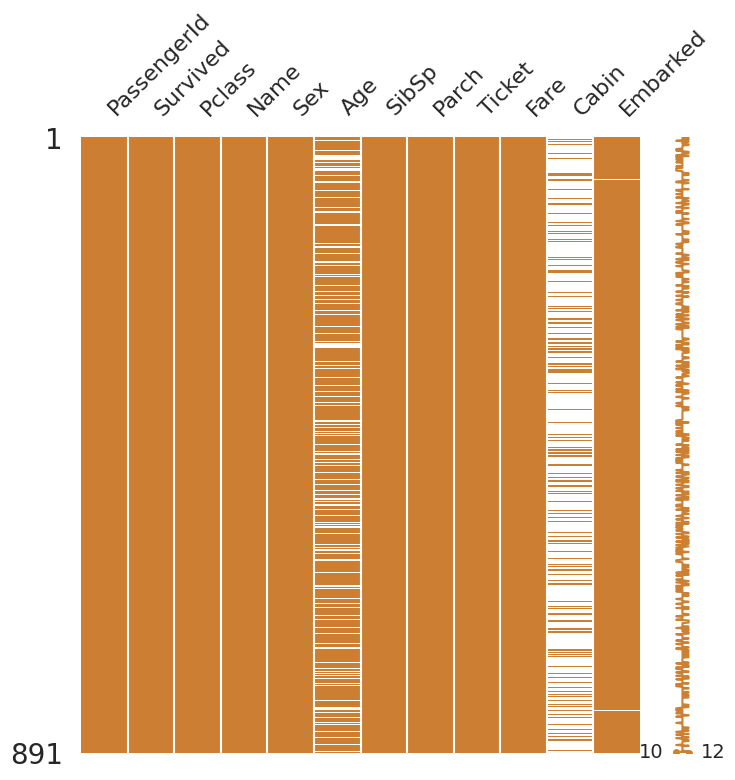

In [11]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # visualisation 해서 null 데이터를 보다 직관적으로 파악하기

<Axes: >

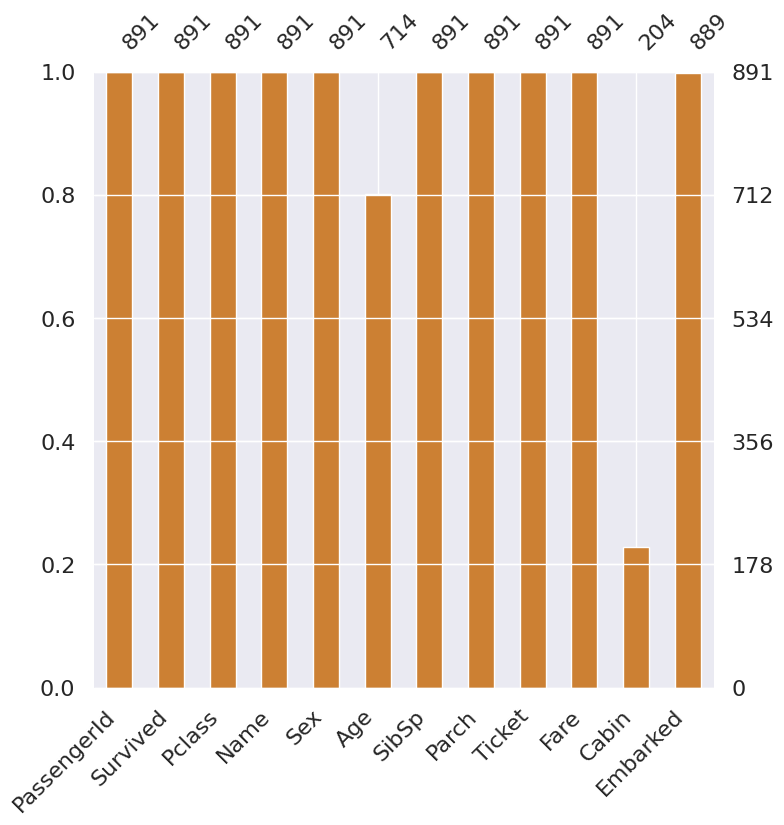

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 빈칸은 null (어디 얼마나 있는지 알 수 있는; cabin에 null data가 많이 있다는 것을 파악할 수 있음)

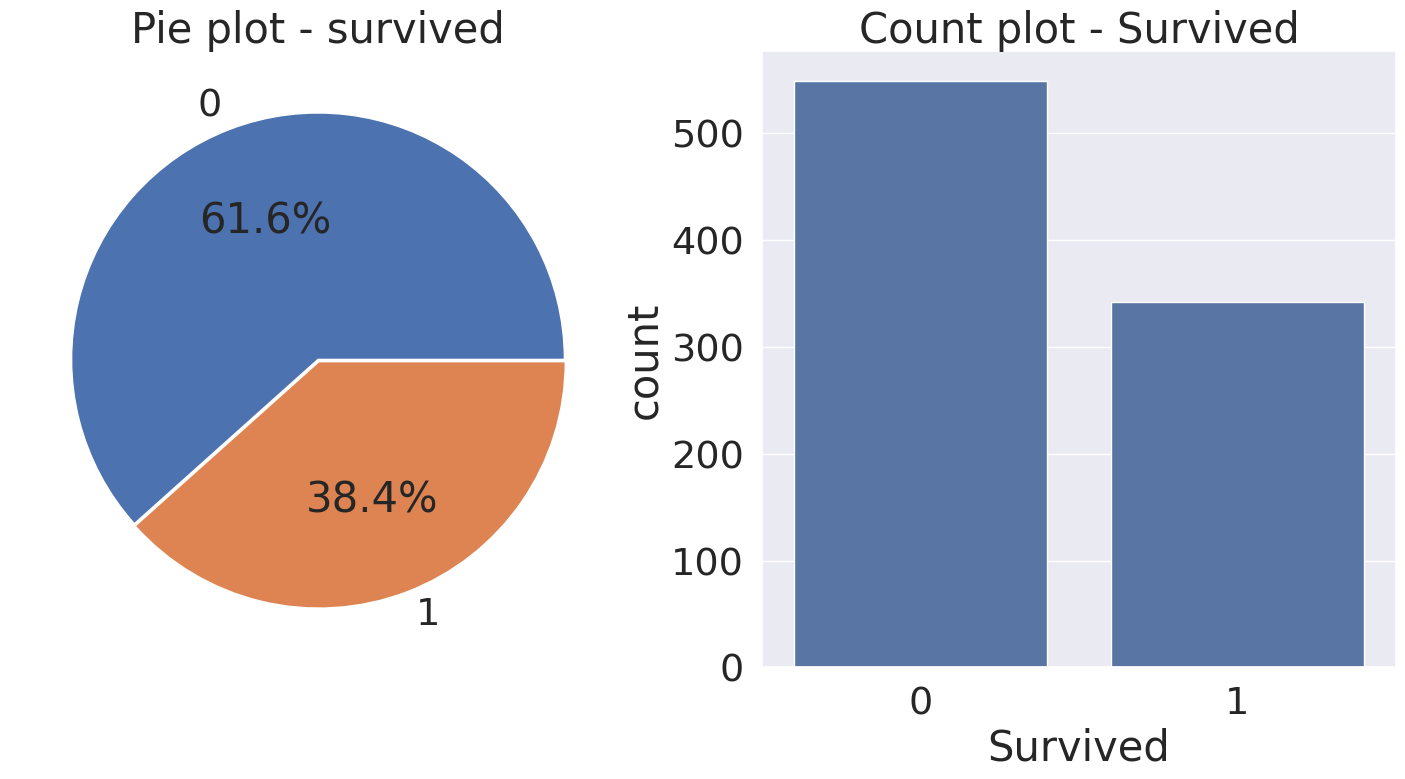

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
#하나씩 뜯어보면 사실 독학이 가능함
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.01], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#하나의 행에 두개의 그림이 있음

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
# 본격적인 데이터 분석을 시작

## **본격적인 데이터 분석을 시작**

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
#분석에 따라 summer 대신 다른 색을 부여할 수도 수 있음
# Use code with caution
# 이 코드는 교차표(Crosstab), 또는 분할표(Contingency Table) 라고 불리는 표를 생성합니다. 이 표는 타이타닉 데이터셋에서 Pclass (승객 등급) 과 Survived (생존 여부) 두 변수 간의 관계를 보여줍니다.

# 표의 내용:

# 표의 행(row)은 Pclass (승객 등급)을 나타냅니다. 1, 2, 3등석과 'All' (전체)이 표시됩니다.
# 표의 열(column)은 Survived (생존 여부)를 나타냅니다. 0 (사망), 1 (생존)과 'All' (전체)이 표시됩니다.
# 표의 각 셀(cell)은 해당 승객 등급과 생존 여부에 해당하는 승객 수를 나타냅니다.
# 예를 들어, 1등석 승객 중 생존자 수, 3등석 승객 중 사망자 수 등을 확인할 수 있습니다.
# 'All' 행과 열은 각각 등급별/생존 여부별 승객 수의 합계를 보여줍니다.
# background_gradient(cmap='summer_r') 부분:


# summer_r 컬러맵을 사용하여 값이 클수록 진한 색상, 값이 작을수록 밝은 색상으로 표시됩니다.
# 요약:


# 이 코드는 타이타닉 데이터셋에서 승객 등급과 생존 여부 간의 관계를 보여주는 교차표를 생성하고, 색상 그라데이션을 적용하여 시각적으로 표현합니다. 이를 통해 데이터 분석가는 두 변수 간의 관계를 더 쉽게 파악하고 분석할 수 있습니다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

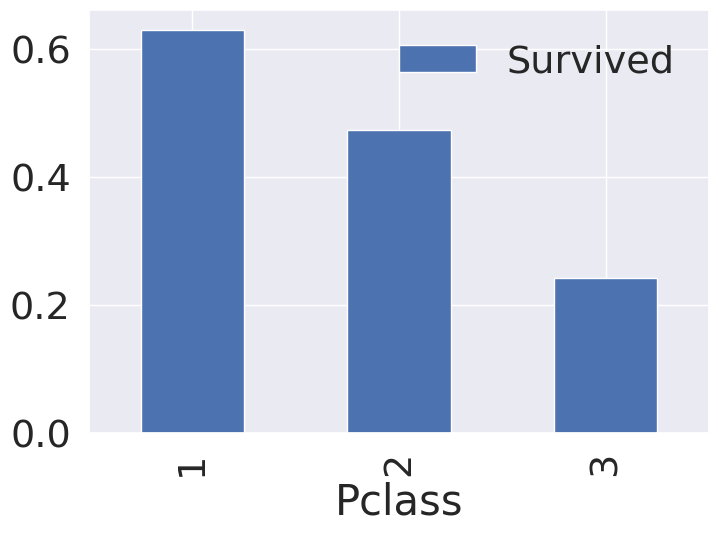

In [18]:
#여기서는 mean으로 분석

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

# groupby(['Pclass'], as_index=True): This line groups the data based on the 'Pclass' column (passenger class). The crucial part is as_index=True. This setting ensures that the 'Pclass' column becomes the index of the resulting DataFrame after the grouping operation.
#p class가 좋을수록 생존률이 높음.
#단계적으로 visaulisation 하면서 코드 더욱 정확하게 익힐 수 있도록 할 것

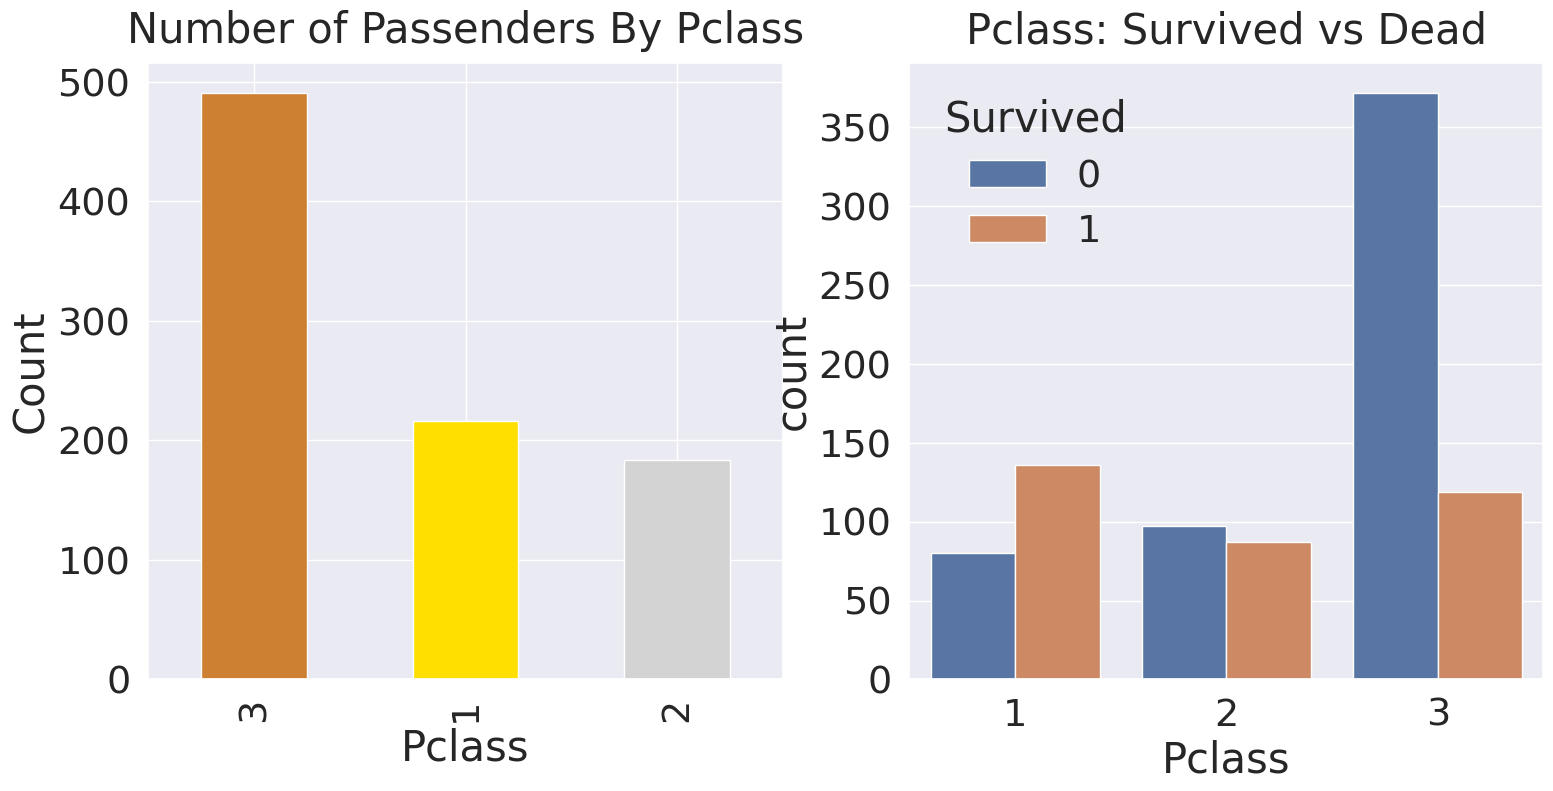

In [19]:
#그래프를 좀 더 직관적으로 그려보기

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # Now plt is defined and accessible here
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passenders By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


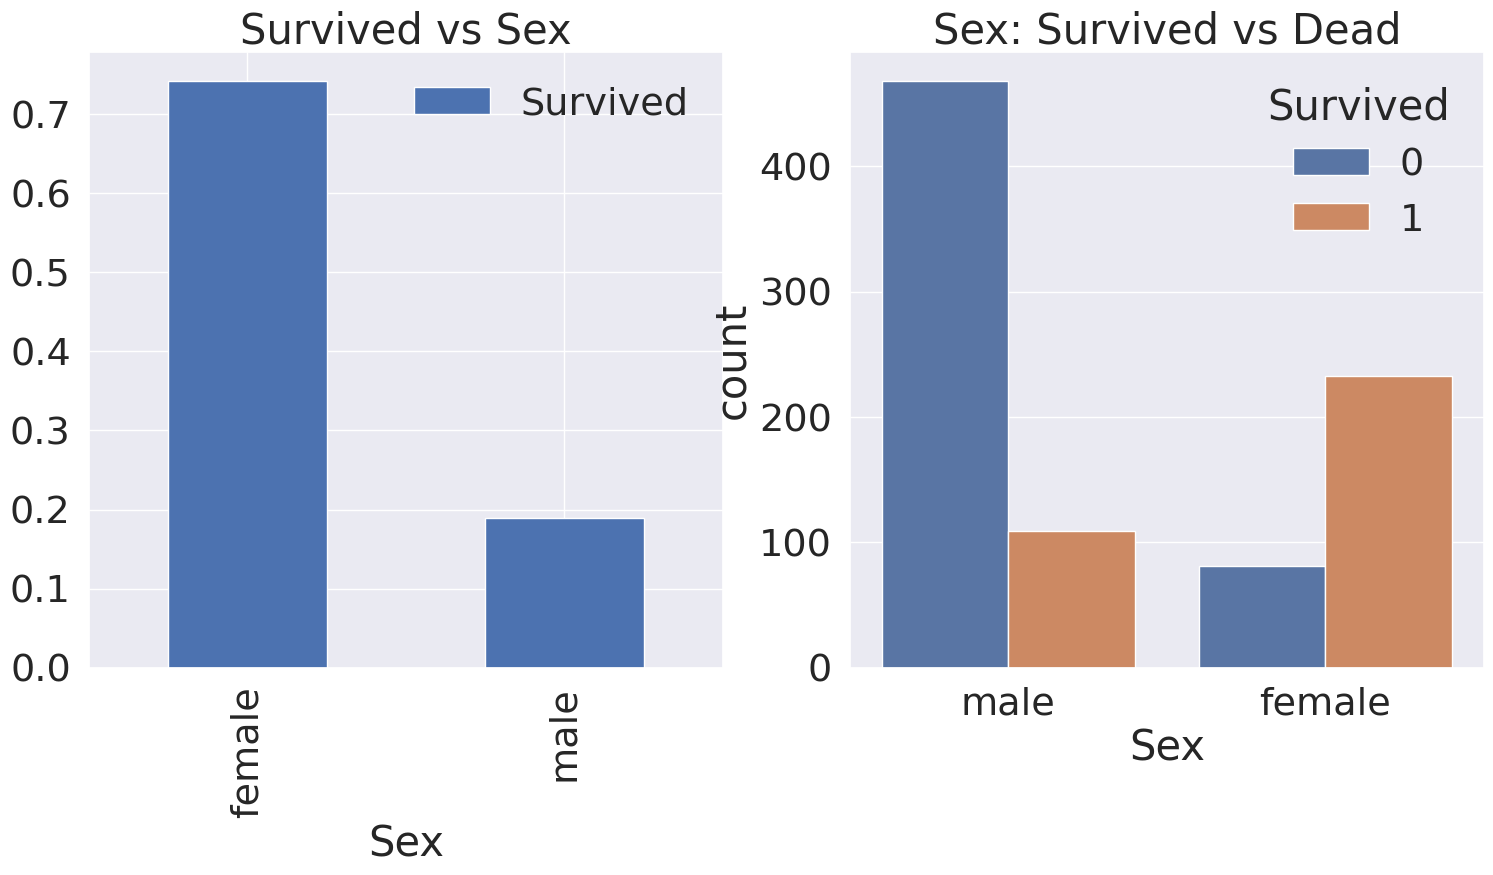

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show() #성별로 나누었을 때 여성의 생존 확률이 높았음

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#sex로 group by 하고 survived 의 mean 값을 오름차순하기

,Sex,Survived
0,female,0.742038
1,male,0.188908


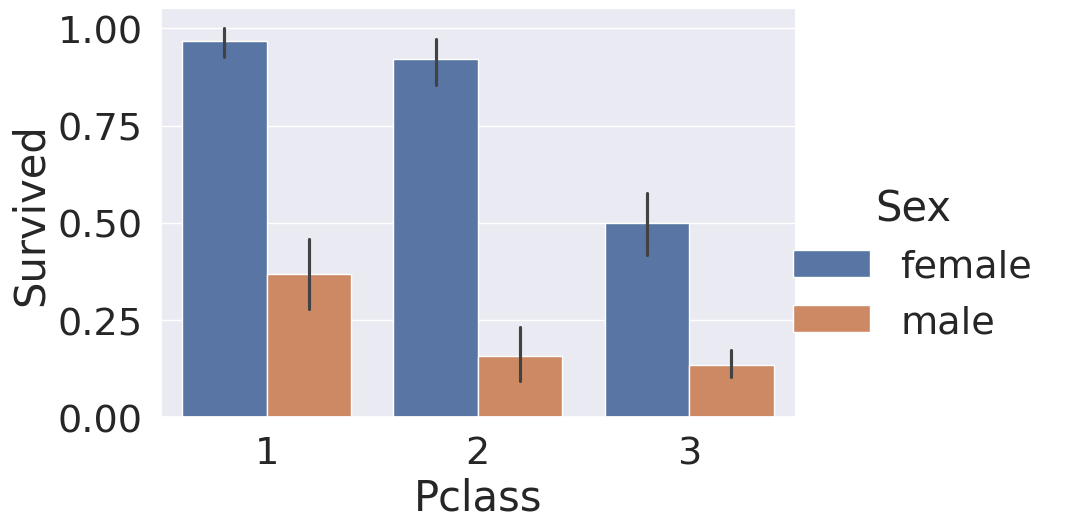

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='bar', height=6, aspect=1.5)


<Axes: xlabel='Pclass', ylabel='Survived'>

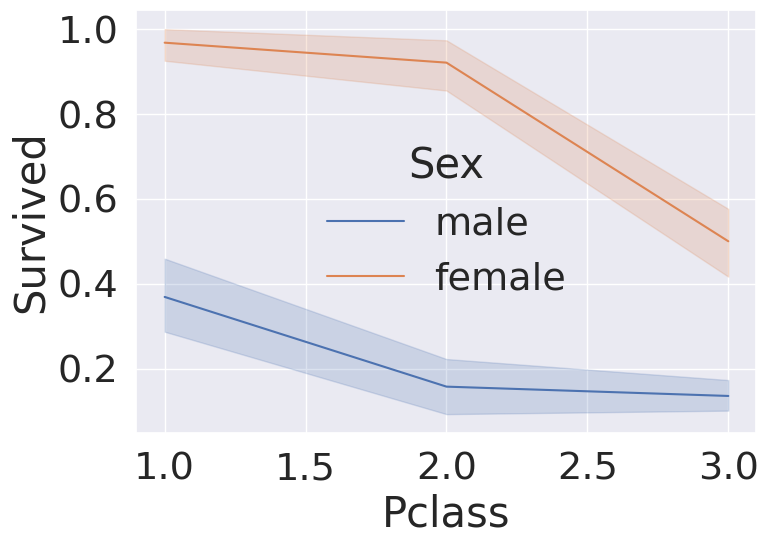

In [23]:
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

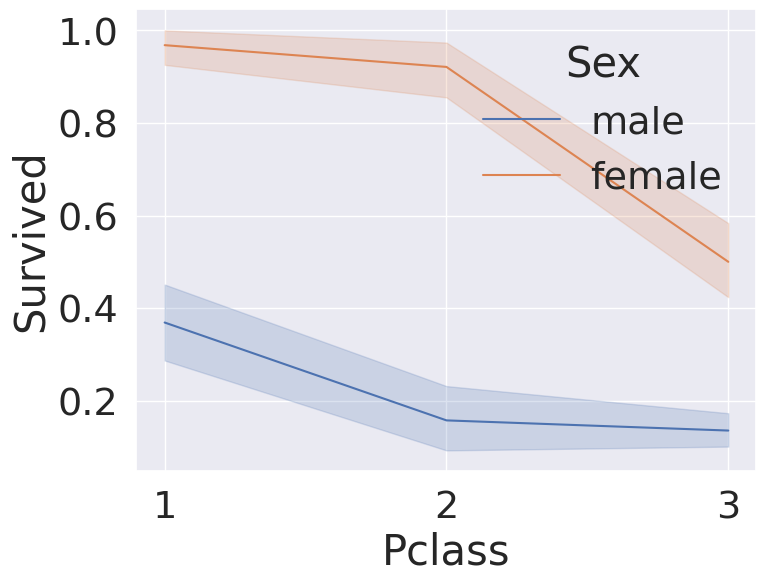

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
ax.set_xticks([1, 2, 3])  # Set x-axis ticks to only show 1, 2, and 3
plt.show()

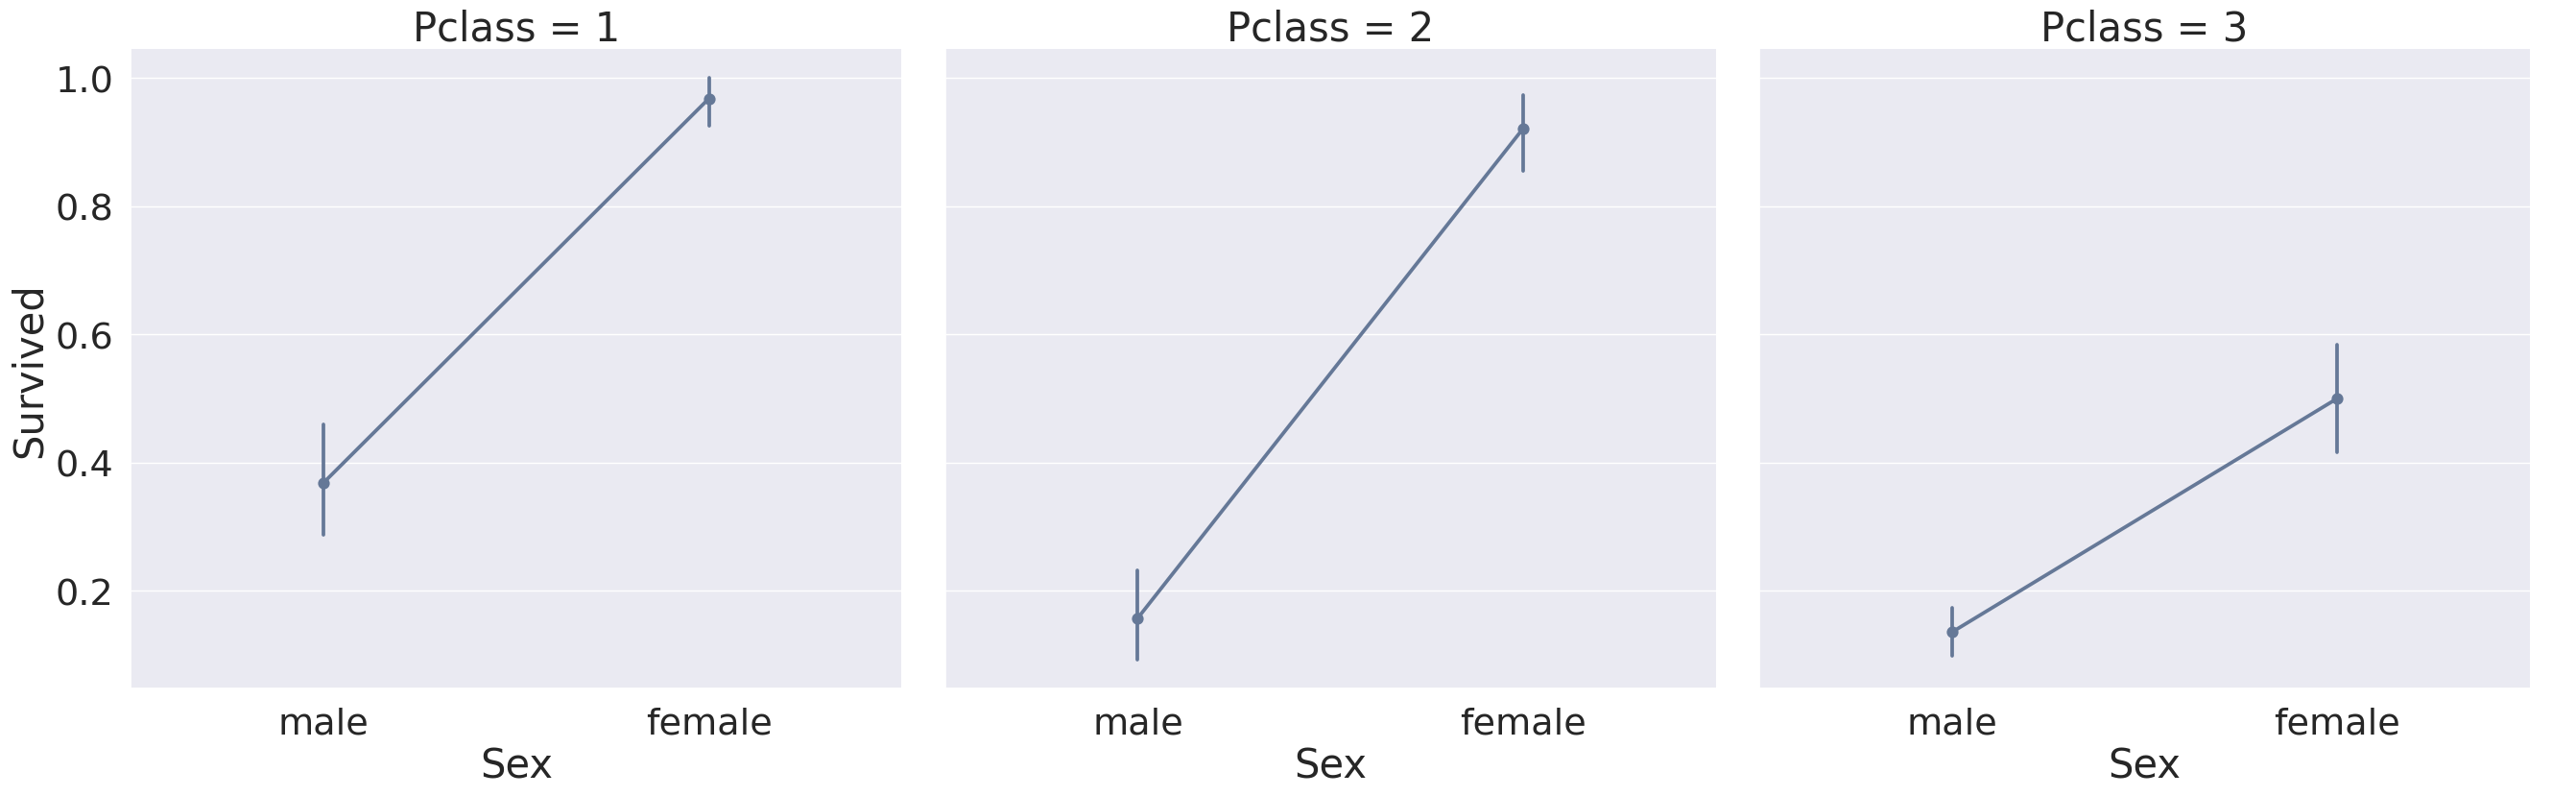

In [26]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', saturation=.5, height=9, aspect=1)

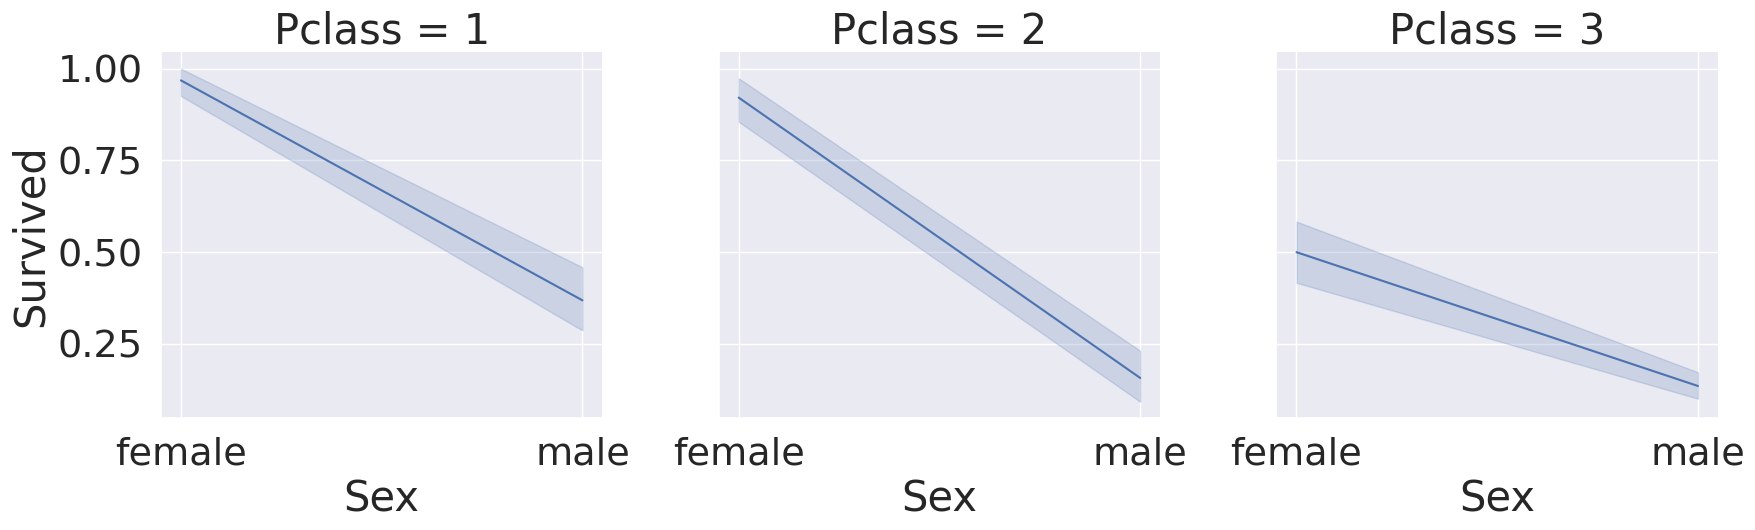

In [27]:
sns.relplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='line', height=6, aspect=1)


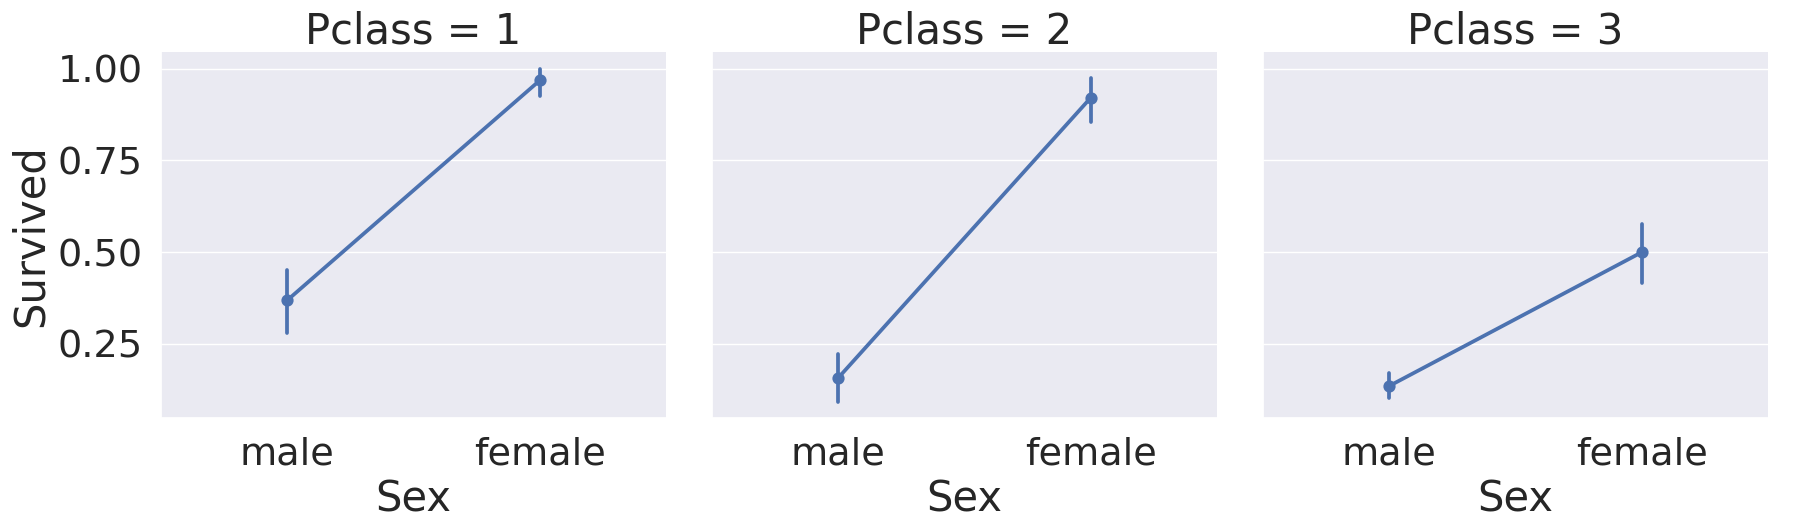

In [28]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', height=6, aspect=1, order=['male', 'female'])


In [29]:

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
#Use code with caution


제일 나이 많은 탑승객 : 80.0 Years
제일 나이 적은 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


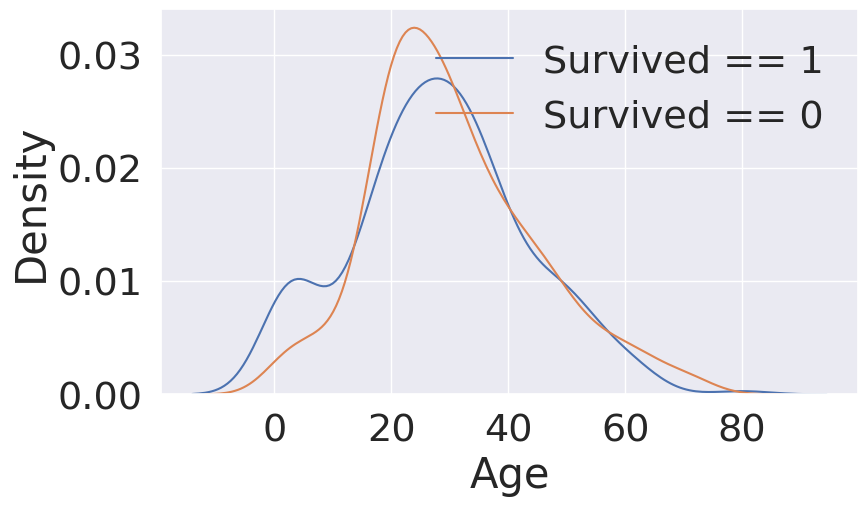

In [30]:
#생존에 따른 히스토그램 써보기

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: ylabel='Density'>

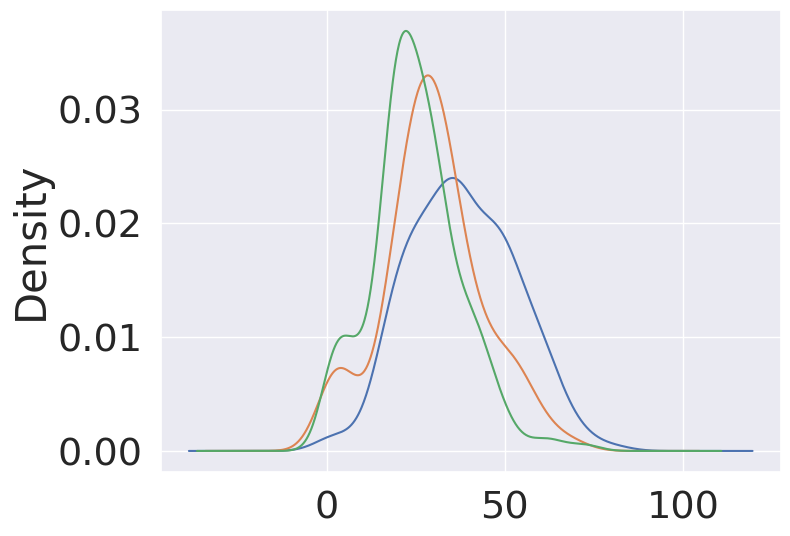

In [31]:
#age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

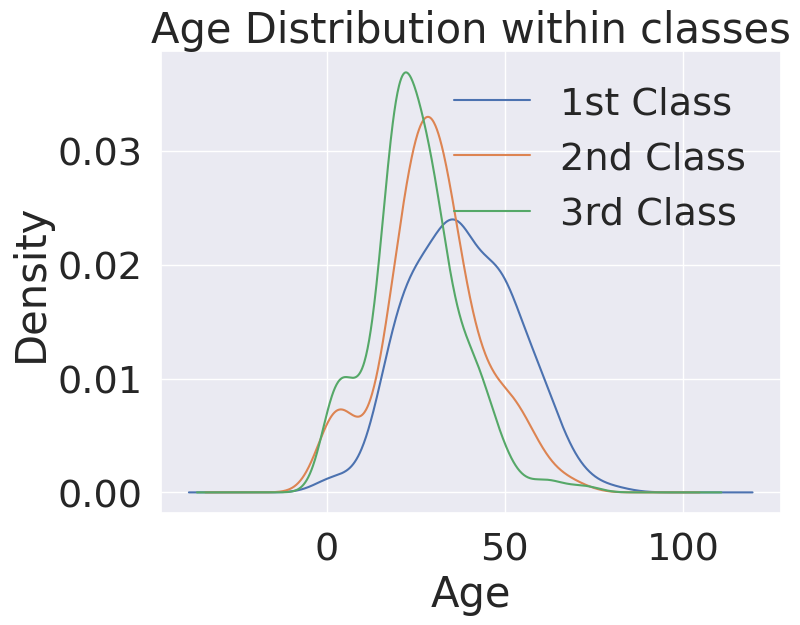

In [32]:
#age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age') # xlable을 xlabel로 수정
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


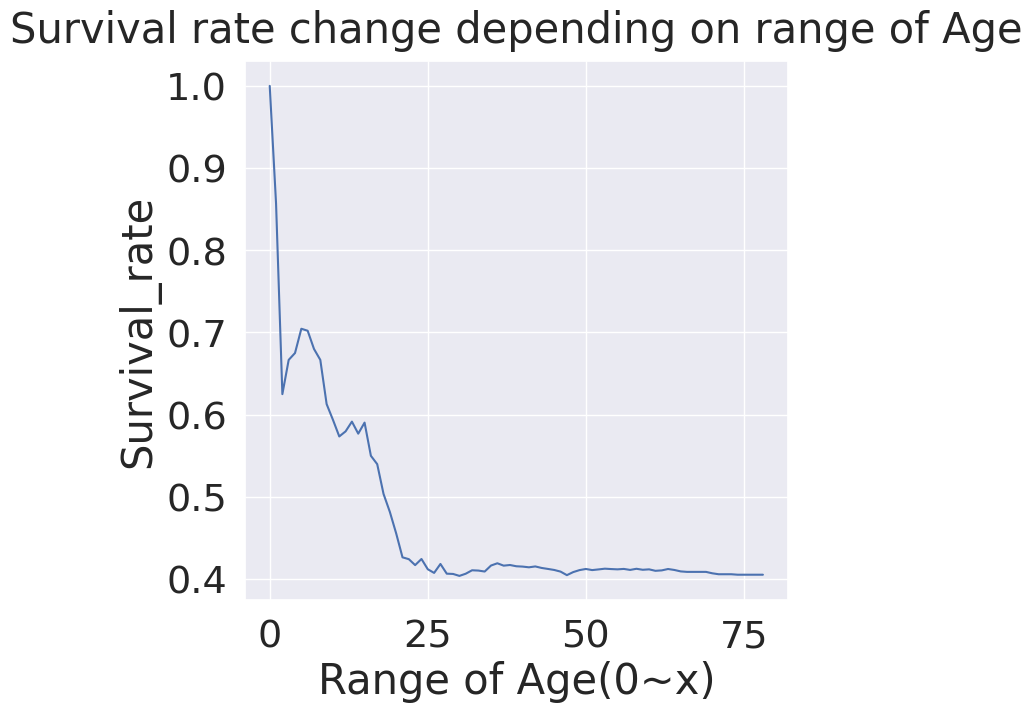

In [33]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival_rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

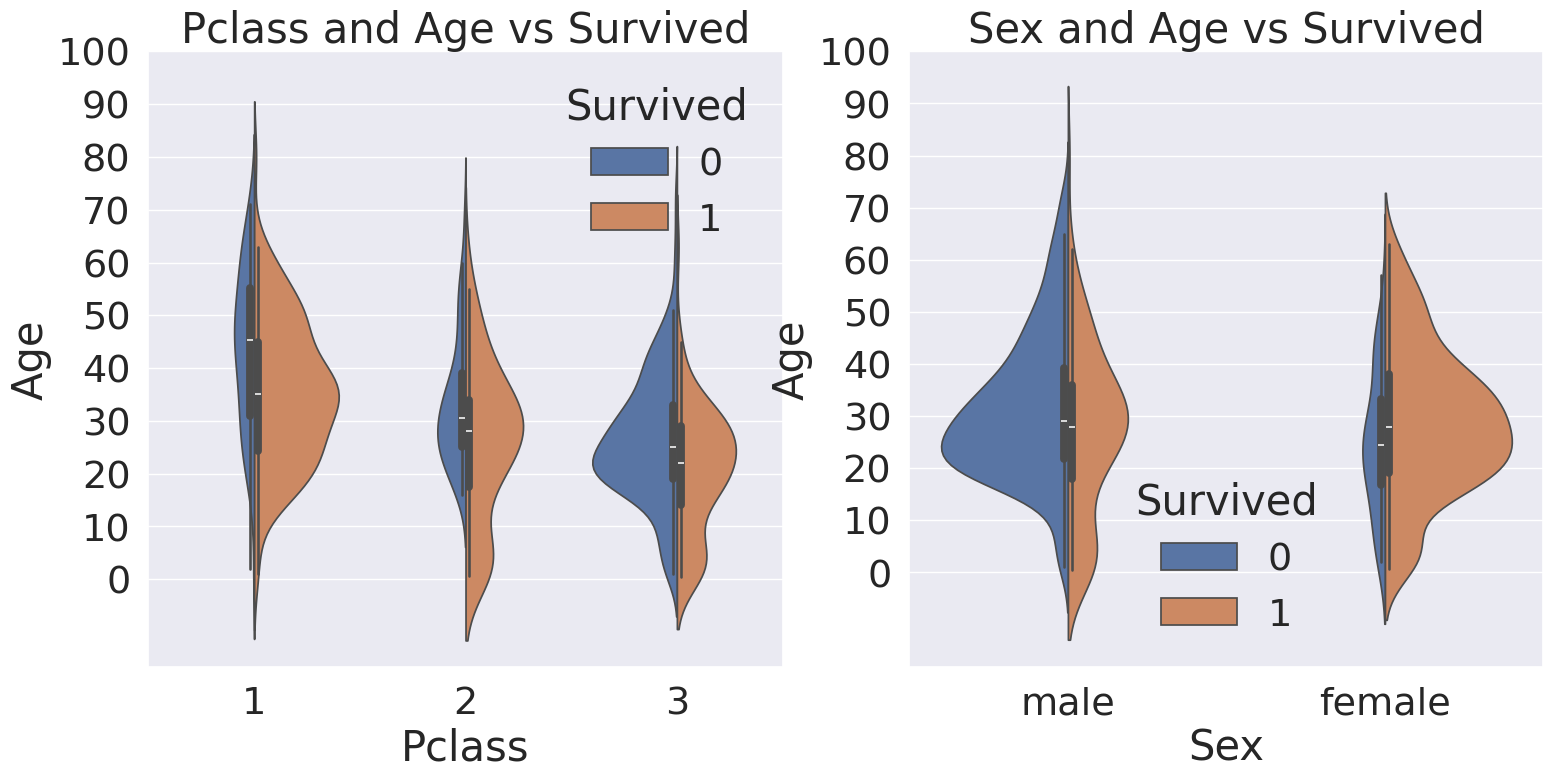

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# data를 키워드 인수로 전달
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# data를 키워드 인수로 전달
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## **2.6. Embarked**

<Axes: xlabel='Embarked'>

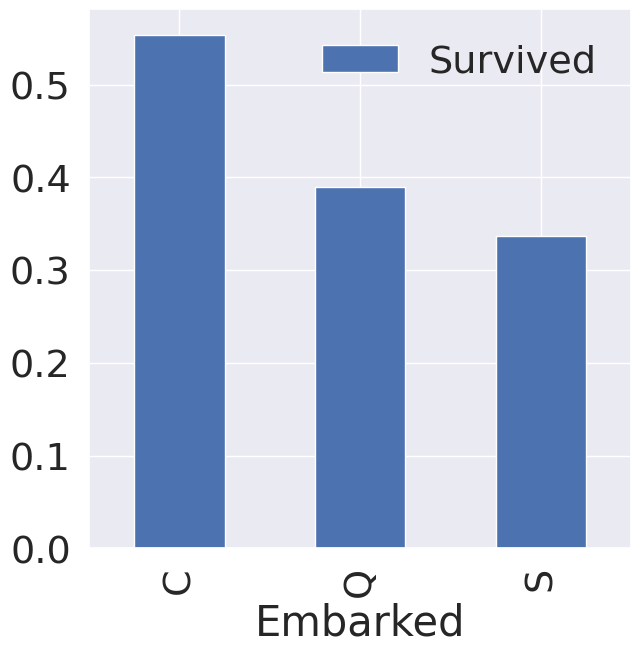

In [35]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']]. groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

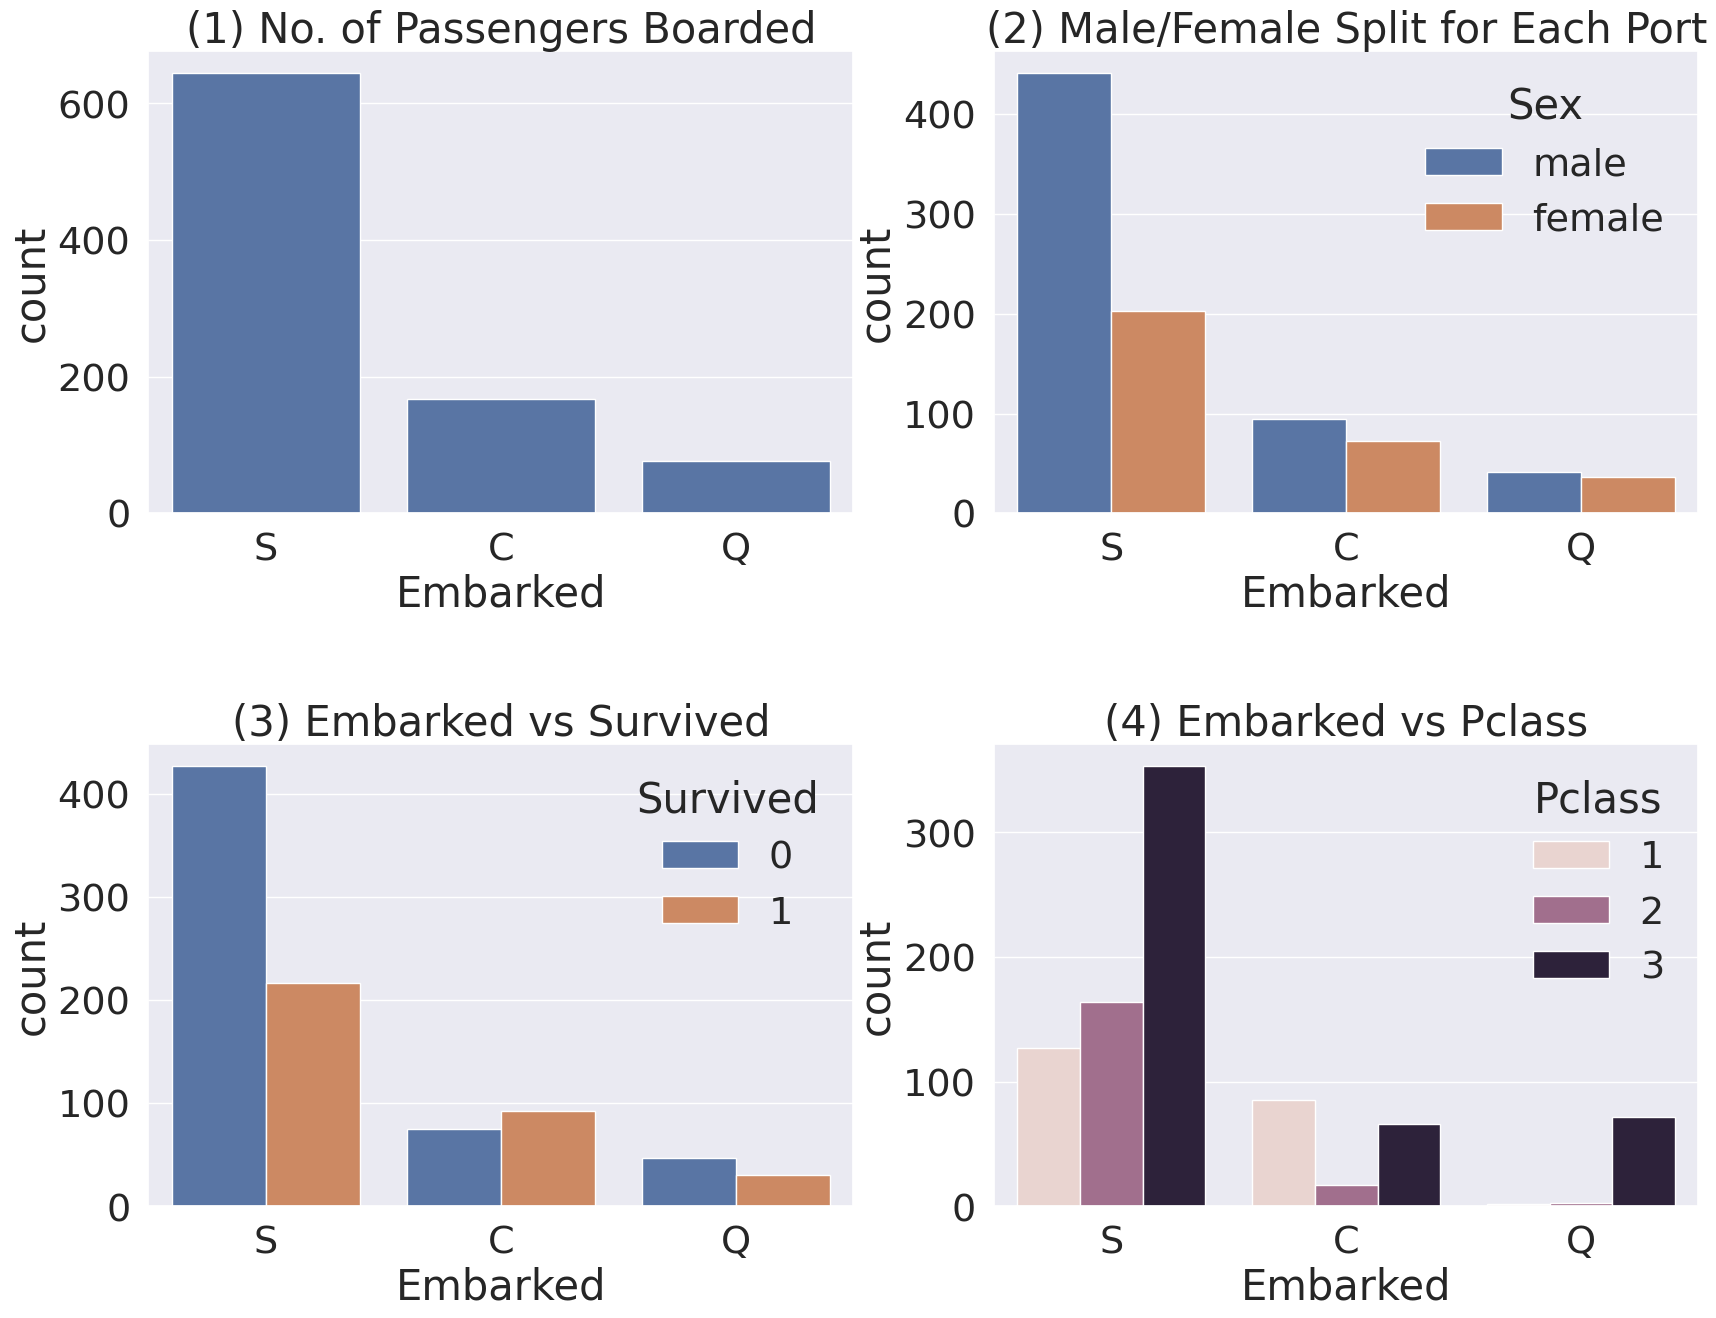

In [36]:
# 2행 2열짜리 subplot 생성, 전체 그림 크기는 20x15로 설정
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# (1) Embarked(탑승 항구)별 승객 수 분포
# → 탑승 항구는 C(Cherbourg), Q(Queenstown), S(Southampton)로 분류됨
# → 어떤 항구에서 많이 탑승했는지 파악 가능 (예: 대부분 S에서 탑승)
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

# (2) Embarked vs Sex (성별 분포)
# → 각 항구에서 남성과 여성 승객이 얼마나 탑승했는지 비교
# → 항구마다 성별 비율이 다를 수 있음 (예: 특정 항구에 여성 승객이 많았다면 구조 확률도 영향을 받을 수 있음)
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male/Female Split for Each Port')

# (3) Embarked vs Survived (생존률 분포)
# → 탑승 항구별 생존/사망 비율 분석
# → 특정 항구에서 탑승한 승객이 상대적으로 높은 생존률을 보인다면 구조 시 우선순위 혹은 계급 비율 차이 때문일 수도 있음
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# (4) Embarked vs Pclass (탑승 클래스 분포)
# → 각 항구별로 어떤 사회계층(Pclass)의 승객이 많이 탑승했는지 확인 가능
# → 계급(Pclass)은 생존률과 밀접한 상관관계가 있기 때문에 중요 포인트
# → 예: 특정 항구에서 1등석 승객이 많이 탑승했다면 생존률도 높게 나올 수 있음
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

# subplot 간 간격 조정 (너무 붙지 않도록 여백 조절)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# 시각화 결과 출력
plt.show()

## **Family - sibsp + parch**

In [37]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [38]:
print("Maxium size of Faily: ", df_train['FamilySize'].max())
print("Minimum size of Faily: ", df_train['FamilySize'].min())

Maxium size of Faily:  11
Minimum size of Faily:  1


Family Size 와 생존의 관계 살펴보기

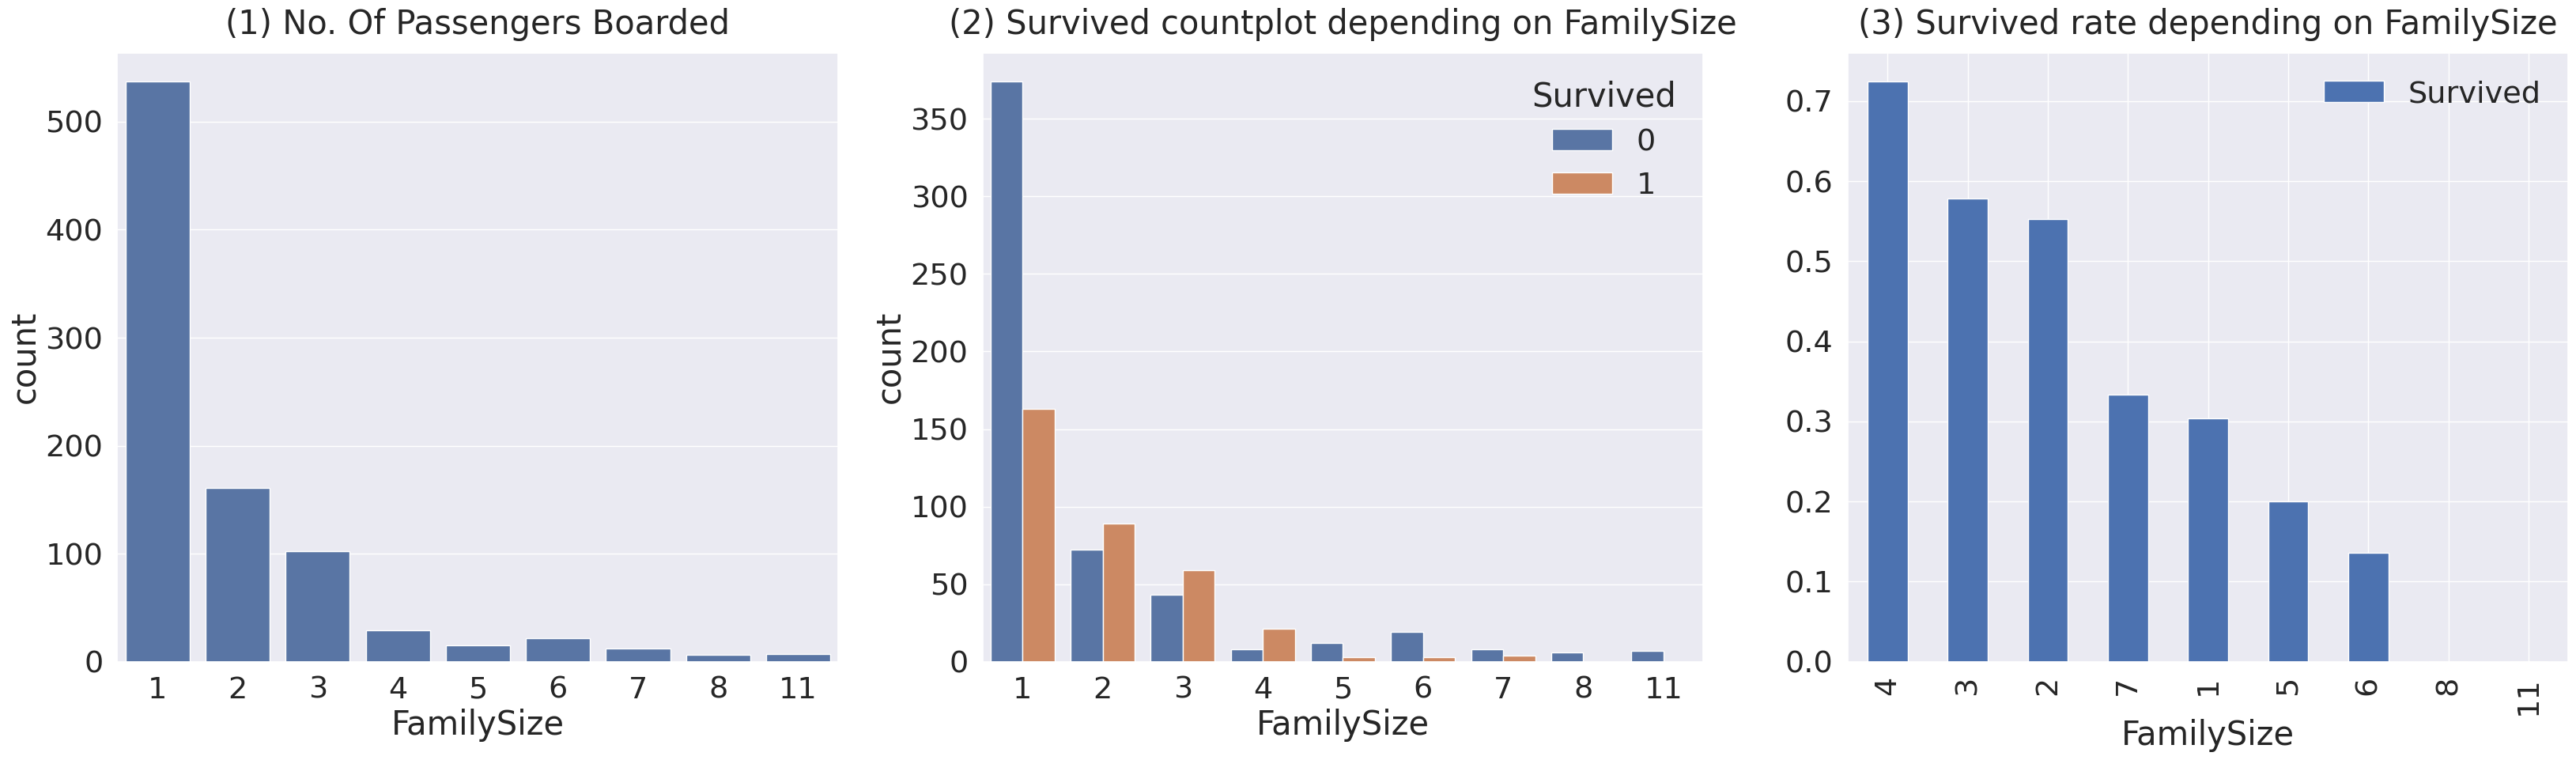

In [39]:


# 1행 3열짜리 subplot 생성, 전체 그림 크기는 매우 크게 설정 (폭 40, 높이 10)
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# (1) 가족 수(FamilySize)에 따른 전체 탑승자 수 분포
# → 각 FamilySize(= 본인 포함한 가족 수) 값에 몇 명의 승객이 있었는지 보여줌
# → 특정 가족 크기가 많은 비중을 차지했는지 확인 가능
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# (2) 가족 수에 따른 생존/사망 카운트 비교
# → hue='Survived'로 생존 여부에 따라 다른 색으로 표시
# → 가족 크기가 생존율에 영향을 주었는지 육안으로 판단 가능
# → 예: 가족이 너무 많거나 너무 적으면 생존률이 낮아질 수 있음
sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# (3) 가족 수별 생존 **비율** 막대그래프
# → groupby로 FamilySize별로 평균 생존률 계산 (Survived=1이면 생존, 0이면 사망)
# → sort_values로 생존율 높은 순으로 정렬
# → 어떤 가족 수에서 생존률이 가장 높았는지 확인 가능
df_train[['FamilySize', 'Survived']]\
    .groupby(['FamilySize'], as_index=True)\
    .mean()\
    .sort_values(by='Survived', ascending=False)\
    .plot.bar(ax=ax[2])  # ⛔ 오타 수정 필요: 'assending' → 'ascending'
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

# subplot 사이 간격 조정 (가로, 세로 여백 설정)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# 최종 시각화 출력
plt.show()


# Fare

Text(0.5, 1.0, 'Distribution of Fare with Skewness')

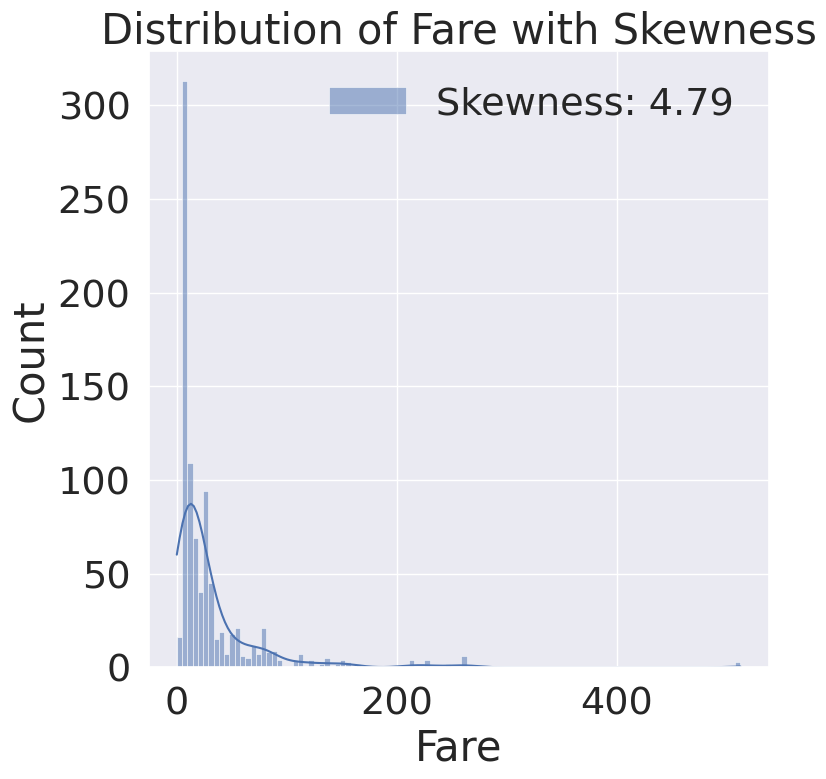

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 왜도 계산
fare_skew = df_train['Fare'].skew()

# 요금 분포 시각화: histogram + KDE 곡선
sns.histplot(df_train['Fare'], kde=True, color='b', ax=ax, label='Skewness: {:.2f}'.format(fare_skew))

# 범례 표시
ax.legend(loc='best')
ax.set_title('Distribution of Fare with Skewness')

#distribution이 매우 비대칭이므로 fare 를 log에 넣어줄 것, 대부분의 사람들이 3등석 fare를 내고 탔다는 말 맞음

In [41]:
# -----------------------------
# ❗ Fare 전처리
# -----------------------------
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()  # 결측값을 평균으로 대체
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)  # 로그 변환 (0 제외)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)    # 테스트셋도 로그 변환

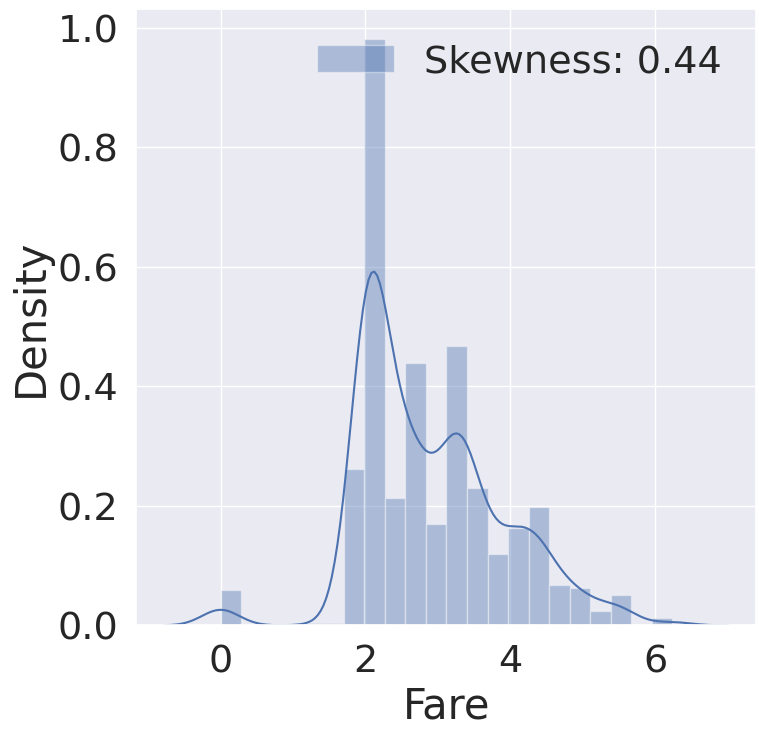

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  # 1개의 그래프(fig), 크기는 8x8
g = sns.distplot(df_train['Fare'], color='b',        # Fare 컬럼의 분포를 파란색으로 표시 (히스토그램 + KDE 곡선)
                 label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),  # 왜도(Skewness) 값을 레이블에 표시
                 ax=ax)
g = g.legend(loc='best')  # 범례 표시 (위치 자동 조정)
#log 는 사실 feacture engineering 부분에서 많이 사용함

# **2.9 Cabin**

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


# 2.10 **Ticket**

In [44]:
df_train['Ticket'].value_counts() #타이타닉 데이터셋에서 Ticket 컬럼의 값들이 얼마나 자주 등장하는지 확인

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [45]:
# 이름(Name) 컬럼에서 마침표로 끝나는 알파벳 단어(호칭: Mr., Mrs. 등)를 괄호로 캡처하여 추출
#df_train['Initial'] = df_train.Name.str.extract(r'([A-Za-z]+\.)')  # 예: "Smith, Mr. John" → "Mr."
df_train['Initial'] = df_train['Name'].str.extract(r'([A-Za-z]+)\.')[0].str.strip().str.title()


# 테스트 데이터도 동일하게 처리 (오타 수정 및 캡처 그룹 추가)
#df_test['Initial'] = df_test.Name.str.extract(r'([A-Za-z]+\.)')    # 예: "Doe, Mrs. Jane" → "Mrs."
df_test['Initial'] = df_test['Name'].str.extract(r'([A-Za-z]+)\.')[0].str.strip().str.title()

In [46]:
# Initial(호칭)과 Sex(성별) 간의 빈도표(도수분포표)를 생성
# 행: Initial (예: Mr., Mrs., Miss. 등), 열: Sex (male, female)
# 예를 들어 Mr.는 남자 몇 명인지, Miss는 여자가 몇 명인지 등을 계산
crosstab = pd.crosstab(df_train['Initial'], df_train['Sex'])

# .T: 전치(Transpose) — 행과 열을 뒤집어서 성별을 행으로, 호칭을 열로 배치
# 보기 좋게 구성: 성별(male/female)이 행으로, 호칭(Mr., Mrs. 등)이 열로 정렬됨
transposed = crosstab.T

# .style.background_gradient(): 셀 값의 크기에 따라 배경 색상 적용 (그라디언트)
# cmap='summer_r'는 색상맵을 반전된 여름 테마로 적용 → 값이 높을수록 색이 진하게 표시됨
# 이걸로 성별-호칭 분포가 한눈에 시각적으로 파악 가능
transposed.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [47]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='PuBu')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [48]:
# 희귀하거나 특수한 호칭(Initial)을 일반적인 호칭으로 통합하는 작업
# 예를 들어 Dr, Rev, Col, Major, Sir 등은 모두 'Mr'로 간주
# 귀족 여성 호칭은 'Mrs'로, Mile, Mme, Ms는 'Miss'로 정리
# Jonkheer, Dona 같은 희귀 귀족 칭호는 'Other'로 통합

# df_train에 동일하게 적용
df_train['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'],
    inplace=True
)

# df_test에 동일하게 적용
df_test['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'],
    inplace=True
)


In [49]:
# 숫자형 컬럼만 골라서 groupby().mean() 하기
df_train.groupby('Initial')[df_train.select_dtypes(include='number').columns].mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

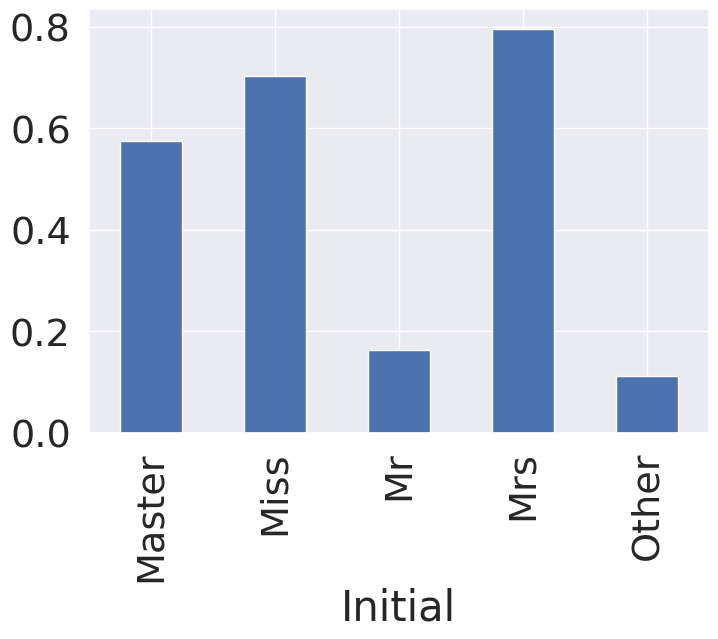

In [50]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [51]:
#본격적으로 null 채우기 - 1) statistics 를 활용하기, null data를 기반으로 새로운 머신러닝 알고리즘을 만들어서 채워넣기
#statistics; trainning data
#pandas dataframe을 다룰 때에는 boolen array를 이용하여 index
#loc + boolean + column 방법

df_train.groupby('Initial')[df_train.select_dtypes(include='number').columns].mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [52]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

## **3.1.2. Fill Null in Embarked** ##

In [53]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [54]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [55]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 내야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 내야함 ->  True


In [56]:
df_train.drop(['Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## **Change initial, embarked and sex (string to numberic)**

In [57]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [58]:
df_train['Embarked'].unique()
#embarked c, q, s로 이루어 있는 것 map으로 바꾸기, 그러기에 앞서서 unique() 메소드 혹은 value_counts()쓰기

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
df_train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [60]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [61]:
df_train['Embarked'].isnull().any()

np.True_

In [62]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

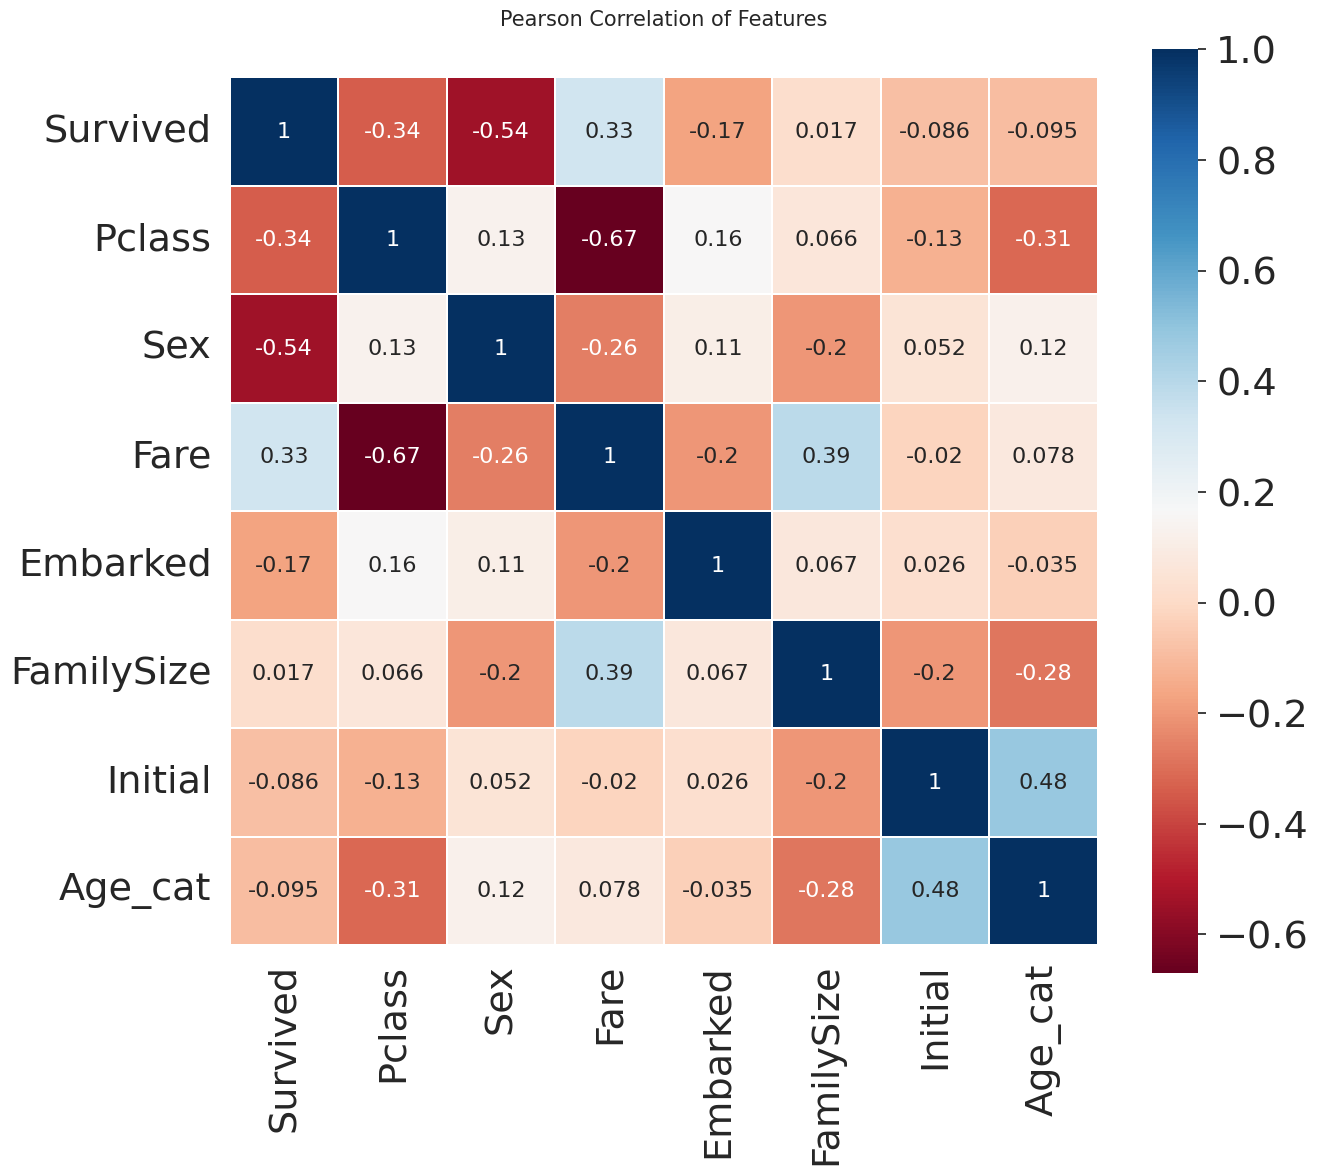

In [63]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

In [64]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2.0,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0.0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2.0,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2.0,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2.0,1,3,False,False,True,False,False


In [66]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

# **3.5. Drop Columns**

In [69]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [70]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0,3,1,22.0,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,38.0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,26.0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,35.0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,35.0,2.085672,1,3,False,False,True,False,False,False,False,True


In [71]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,False,True,False
1,3,0,1.945910,2,4,False,False,True
2,2,1,2.270836,1,6,False,True,False
3,3,1,2.159003,1,2,False,False,True
4,3,0,2.508582,3,2,False,False,True


# 4. Building machine learning model and prediction using the trained model

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## **4.1 preparation - split dataset into train, valid, test set**

In [74]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [75]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
#https://scikit-learn.org/stable/supervised_learning.html#supervised-learning


## **4.2. Model Generation and Prediction**

In [76]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [77]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 86.94% 정확도로 생존을 맞춤


# **4.3. feacture importance**

In [83]:
from pandas import Series

# 특성 중요도
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()



ValueError: Length of values (14) does not match length of index (8)

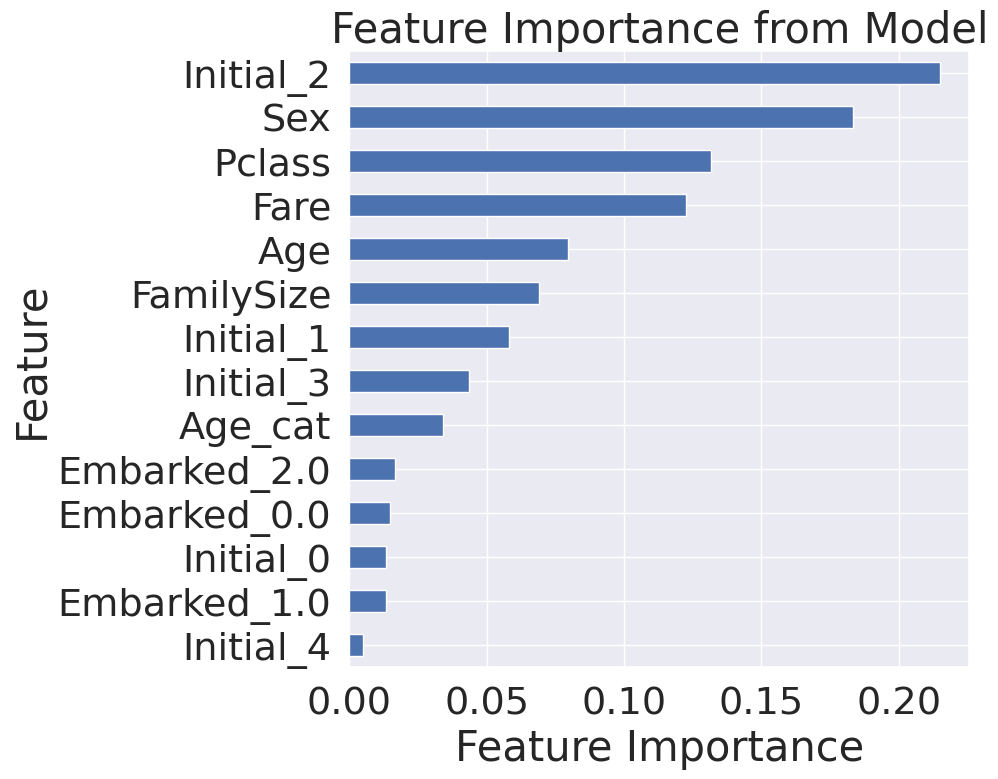

In [85]:
from pandas import Series
import matplotlib.pyplot as plt

# 1. 모델 학습에 사용했던 X 재정의 (Survived 제거)
X = df_train.drop('Survived', axis=1)

# 2. 특성 중요도 추출
feature_importance = model.feature_importances_

# 3. Series로 변환 (X의 컬럼명 기준으로)
Series_feat_imp = Series(feature_importance, index=X.columns)

# 4. 시각화
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Model')
plt.show()


# **4.4. prediction on test set**

In [87]:
# 1. gender_submission.csv 불러오기
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
